## Standard Libraries ## 

In [726]:
# !pip install wbgapi #Python package for assessing World Bank data
# !pip install shap #SHapley Additive exPlanations
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

import wbgapi as wb

import shap

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Data Preparation #

In [729]:
wb.source.info() #World Bank Database 

id,name,code,concepts,lastupdated
1,Doing Business,DBS,3,2021-08-18
2,World Development Indicators,WDI,3,2025-04-15
3,Worldwide Governance Indicators,WGI,3,2024-11-05
5,Subnational Malnutrition Database,SNM,3,2016-03-21
6,International Debt Statistics,IDS,4,2025-02-26
11,Africa Development Indicators,ADI,3,2013-02-22
12,Education Statistics,EDS,3,2024-06-25
13,Enterprise Surveys,ESY,3,2022-03-25
14,Gender Statistics,GDS,3,2025-04-15
15,Global Economic Monitor,GEM,3,2025-04-16


In [731]:
wb.economy.info()

id,value,region,incomeLevel
ABW,Aruba,LCN,HIC
AFE,Africa Eastern and Southern,,
AFG,Afghanistan,SAS,LIC
AFW,Africa Western and Central,,
AGO,Angola,SSF,LMC
ALB,Albania,ECS,UMC
AND,Andorra,ECS,HIC
ARB,Arab World,,
ARE,United Arab Emirates,MEA,HIC
ARG,Argentina,LCN,UMC


In [732]:
wb.economy.DataFrame() #World Bank countries and economies 

,name,aggregate,longitude,latitude,region,adminregion,lendingType,incomeLevel,capitalCity
id,,,,,,,,,
ABW,Aruba,False,-70.0167,12.51670,LCN,,LNX,HIC,Oranjestad
AFE,Africa Eastern and Southern,True,NaN,NaN,,,,,
AFG,Afghanistan,False,69.1761,34.52280,SAS,SAS,IDX,LIC,Kabul
AFW,Africa Western and Central,True,NaN,NaN,,,,,
AGO,Angola,False,13.2420,-8.81155,SSF,SSA,IBD,LMC,Luanda
...,...,...,...,...,...,...,...,...,...
XKX,Kosovo,False,20.9260,42.56500,ECS,ECA,IDX,UMC,Pristina
YEM,"Yemen, Rep.",False,44.2075,15.35200,MEA,MNA,IDX,LIC,Sana'a
ZAF,South Africa,False,28.1871,-25.74600,SSF,SSA,IBD,UMC,Pretoria


In [733]:
wb.series.info('SL.UEM.TOTL.ZS')

id,value
SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
,1 elements


In [735]:
df_AFR_unemployment = wb.data.DataFrame('SL.UEM.TOTL.ZS', wb.region.members('AFR'), range(1994, 2024, 1))

In [737]:
df_AFR_unemployment.head()

,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,YR2000,YR2001,YR2002,YR2003,...,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023
economy,,,,,,,,,,,,,,,,,,,,,
AGO,17.400,16.987,16.275,16.172,16.371,16.593,16.682,16.700,16.488,16.498,...,16.406,16.490,16.575,16.610,16.594,16.497,16.690,15.799,14.602,14.537
BDI,3.095,3.077,3.076,3.116,3.159,3.125,3.129,3.150,3.169,3.134,...,1.572,1.442,1.347,1.247,1.146,1.043,1.030,1.118,0.915,0.921
BEN,1.455,1.305,1.246,1.099,1.048,0.949,0.864,0.765,0.690,0.747,...,1.872,1.820,1.784,1.659,1.410,1.214,1.502,1.779,1.685,1.657
BFA,2.580,2.533,2.451,2.416,2.440,2.549,2.679,2.740,2.851,2.780,...,4.251,4.461,4.587,4.656,4.695,4.710,5.040,5.200,5.389,5.348
BWA,21.200,21.394,21.593,21.048,20.860,18.236,15.880,18.540,21.268,23.800,...,18.514,18.930,19.329,19.664,19.681,20.094,21.017,23.106,23.615,23.381


In [739]:
df_AFR_unemployment.nlargest(20, 'YR2023')

,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,YR2000,YR2001,YR2002,YR2003,...,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023
economy,,,,,,,,,,,,,,,,,,,,,
SWZ,21.717,21.650,22.074,22.500,23.195,23.837,24.502,25.178,25.716,26.216,...,23.828,23.285,22.718,24.523,26.369,28.138,32.944,34.153,35.359,35.086
ZAF,22.942,22.647,22.480,22.518,22.673,22.791,22.714,22.605,22.547,22.629,...,24.890,25.149,26.536,27.035,26.906,28.468,29.217,34.007,33.268,32.098
DJI,27.103,27.279,27.153,27.156,27.013,26.740,26.664,26.599,26.590,26.488,...,26.173,26.070,25.992,26.064,26.184,26.256,27.713,27.668,26.307,26.154
BWA,21.200,21.394,21.593,21.048,20.860,18.236,15.880,18.540,21.268,23.800,...,18.514,18.930,19.329,19.664,19.681,20.094,21.017,23.106,23.615,23.381
GAB,17.794,17.411,17.347,17.197,17.176,17.572,17.789,17.762,17.351,17.119,...,19.916,19.978,20.134,20.303,20.439,20.358,21.270,21.218,20.399,20.278
COG,20.232,20.192,20.033,19.886,19.895,20.110,19.870,19.877,19.664,19.871,...,19.691,19.978,20.223,20.611,20.701,20.392,22.198,21.960,20.108,19.898
NAM,19.400,21.312,22.835,24.450,23.081,21.669,20.300,20.980,21.500,22.052,...,18.521,20.808,23.352,21.733,19.877,19.921,21.004,20.922,19.695,19.365
SOM,19.974,19.747,19.651,19.267,19.169,19.164,18.980,19.076,19.077,19.081,...,18.861,18.597,18.578,18.523,18.738,18.828,19.413,19.662,19.050,18.941
LBY,19.349,19.443,19.296,19.437,19.282,19.334,19.201,19.228,19.247,19.045,...,19.308,19.676,19.522,19.020,18.836,19.050,19.613,19.641,19.282,18.753


In [740]:
df_AFR_unemployment.sort_values(by='YR2023', ascending=False)

,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,YR2000,YR2001,YR2002,YR2003,...,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023
economy,,,,,,,,,,,,,,,,,,,,,
SWZ,21.717,21.650,22.074,22.500,23.195,23.837,24.502,25.178,25.716,26.216,...,23.828,23.285,22.718,24.523,26.369,28.138,32.944,34.153,35.359,35.086
ZAF,22.942,22.647,22.480,22.518,22.673,22.791,22.714,22.605,22.547,22.629,...,24.890,25.149,26.536,27.035,26.906,28.468,29.217,34.007,33.268,32.098
DJI,27.103,27.279,27.153,27.156,27.013,26.740,26.664,26.599,26.590,26.488,...,26.173,26.070,25.992,26.064,26.184,26.256,27.713,27.668,26.307,26.154
BWA,21.200,21.394,21.593,21.048,20.860,18.236,15.880,18.540,21.268,23.800,...,18.514,18.930,19.329,19.664,19.681,20.094,21.017,23.106,23.615,23.381
GAB,17.794,17.411,17.347,17.197,17.176,17.572,17.789,17.762,17.351,17.119,...,19.916,19.978,20.134,20.303,20.439,20.358,21.270,21.218,20.399,20.278
COG,20.232,20.192,20.033,19.886,19.895,20.110,19.870,19.877,19.664,19.871,...,19.691,19.978,20.223,20.611,20.701,20.392,22.198,21.960,20.108,19.898
NAM,19.400,21.312,22.835,24.450,23.081,21.669,20.300,20.980,21.500,22.052,...,18.521,20.808,23.352,21.733,19.877,19.921,21.004,20.922,19.695,19.365
SOM,19.974,19.747,19.651,19.267,19.169,19.164,18.980,19.076,19.077,19.081,...,18.861,18.597,18.578,18.523,18.738,18.828,19.413,19.662,19.050,18.941
LBY,19.349,19.443,19.296,19.437,19.282,19.334,19.201,19.228,19.247,19.045,...,19.308,19.676,19.522,19.020,18.836,19.050,19.613,19.641,19.282,18.753


In [745]:
top_unemployment_df = df_AFR_unemployment.nlargest(10 ,'YR2023')

In [747]:
top_unemployment_df = top_unemployment_df.transpose()

In [749]:
top_unemployment_df.columns.values

array(['SWZ', 'ZAF', 'DJI', 'BWA', 'GAB', 'COG', 'NAM', 'SOM', 'LBY',
       'LSO'], dtype=object)

In [751]:
df_AFR_unemployment = df_AFR_unemployment.transpose()

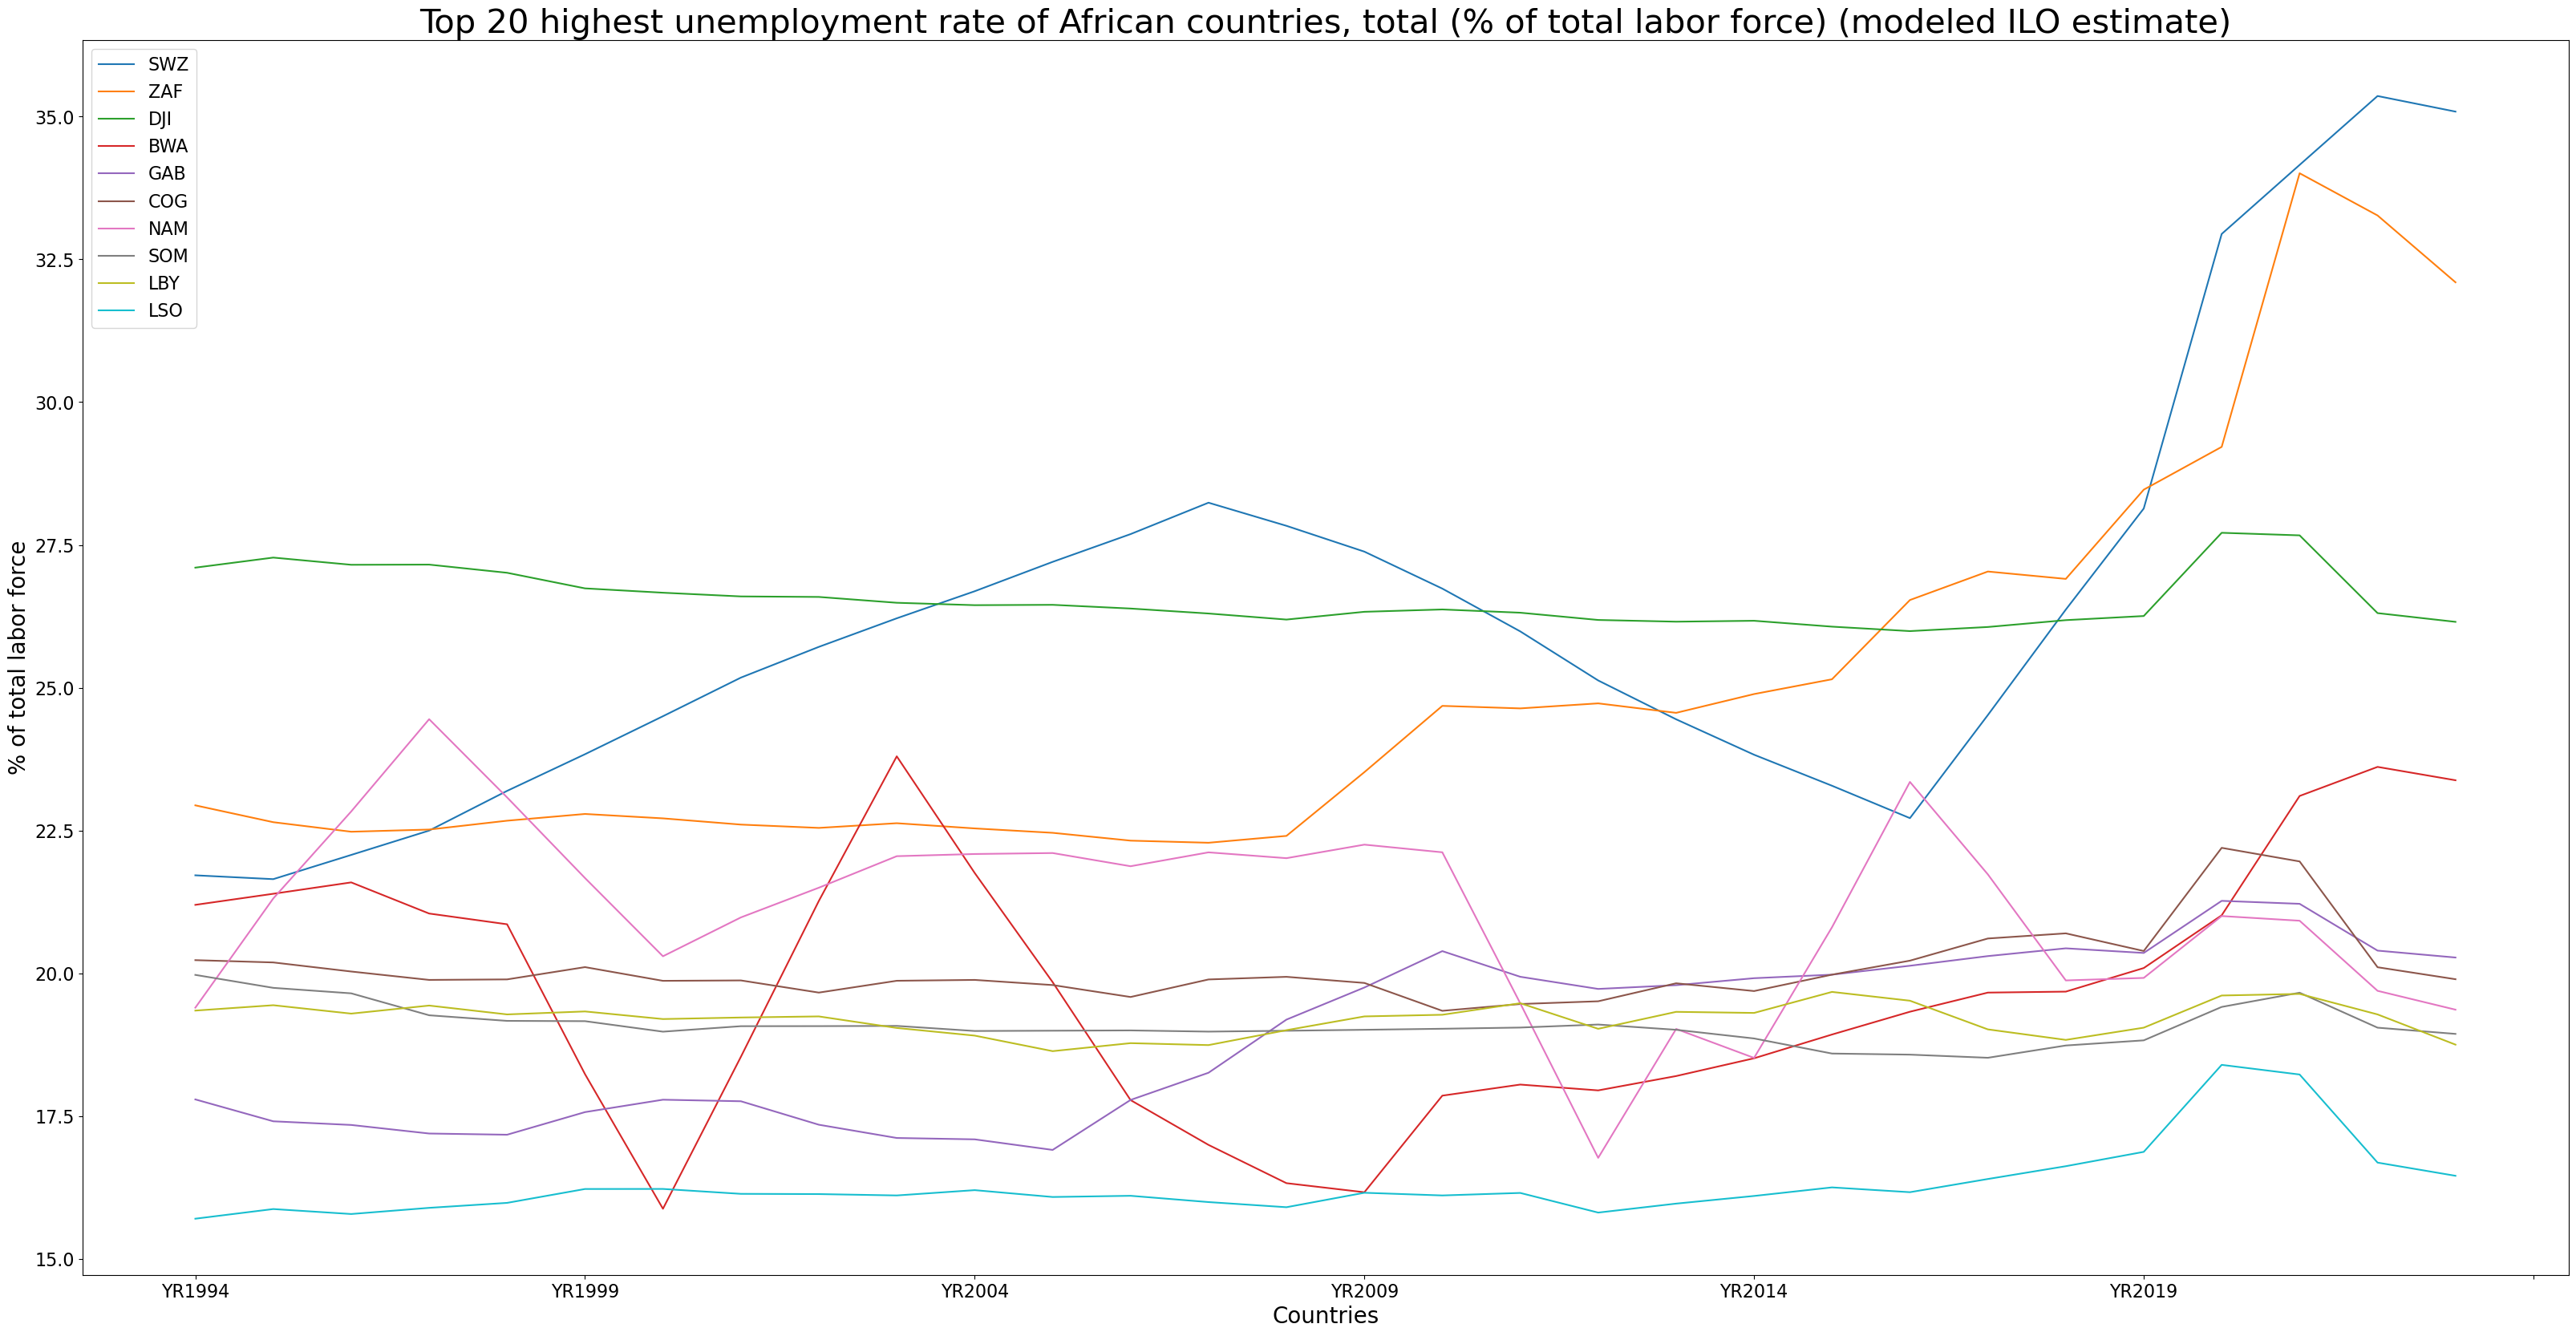

In [753]:
df_AFR_unemployment[top_unemployment_df.columns.values].plot(figsize=(40,20), fontsize=16)

plt.title('Top 20 highest unemployment rate of African countries, total (% of total labor force) (modeled ILO estimate)', fontsize=30)

plt.xlabel('Countries', fontsize=20)
plt.ylabel('% of total labor force', fontsize=20) 
plt.legend(loc='best', fontsize=16)
plt.savefig('Top 20 highest unemployment rate of African countries, total (% of total labor force) (modeled ILO estimate).png')
plt.show()

## South Africa has the second highest enemployment rate in the Africa Continent according the World Band Group 'JOBS' Indicator ##
### This notebooks seeks to understand the factors contributing to the employment rate for South Africa and a model is built to estimate the unemployment rate based on the indicators with the highest correlation ##

# Data Preparation ##
## South Africa Dataset ##
### Preparing the df, which is a dataset of the South African Job - indicators ###

In [757]:
wb.economy.info(q = 'South Africa') #Get the economy info about 'South Africa'

id,value,region,incomeLevel
ZAF,South Africa,SSF,UMC
,1 elements,,


In [758]:
indicators = wb.series.info(db=25) #Get indicators from the 'JOBS' database

In [760]:
indicators_table_dict = vars(indicators)

In [763]:
indicators_table_dict = indicators_table_dict['items']

In [765]:
df = pd.DataFrame(indicators_table_dict)

In [767]:
df = wb.data.DataFrame( df['id'], 'ZAF', range(1994,2025), labels=True)

In [768]:
df.head()

,Series,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,YR2000,YR2001,YR2002,...,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023
series,,,,,,,,,,,,,,,,,,,,,
BM.KLT.DINV.WD.GD.ZS,"Foreign direct investment, net outflows (% of ...",8.211089e-01,1.452179e+00,6.420038e-01,1.375092e+00,1.068096e+00,1.045548e+00,1.826515e-01,-2.595241e+00,-3.116198e-01,...,2.017865e+00,1.590647e+00,1.387725e+00,1.952876e+00,9.936718e-01,8.067546e-01,-5.727833e-01,2.413411e-02,5.835630e-01,-7.386161e-01
BM.TRF.PWKR.CD.DT,"Personal remittances, paid (current US$)",5.715925e+08,5.666172e+08,5.184594e+08,5.818402e+08,6.162285e+08,6.412724e+08,6.142775e+08,5.207600e+08,5.055323e+08,...,1.093586e+09,9.800978e+08,8.967987e+08,1.033490e+09,1.097844e+09,1.052038e+09,9.207818e+08,1.066450e+09,1.011890e+09,9.324204e+08
BX.KLT.DINV.WD.GD.ZS,"Foreign direct investment, net inflows (% of GDP)",2.438954e-01,7.269445e-01,5.001315e-01,2.255053e+00,3.597384e-01,9.921876e-01,6.384275e-01,5.368345e+00,1.146357e+00,...,1.519327e+00,4.387358e-01,6.846126e-01,5.396740e-01,1.374291e+00,1.314078e+00,9.330737e-01,9.660265e+00,2.270469e+00,9.042128e-01
BX.TRF.PWKR.CD,"Personal transfers, receipts (BoP, current US$)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CM.MKT.LCAP.GD.ZS,Market capitalization of listed domestic compa...,1.690566e+02,1.615209e+02,1.479899e+02,1.361359e+02,1.101662e+02,1.714259e+02,1.346274e+02,1.088914e+02,1.409883e+02,...,2.449983e+02,2.122655e+02,2.939935e+02,3.227110e+02,2.135237e+02,2.713229e+02,3.111265e+02,2.715702e+02,2.879554e+02,NaN


In [769]:
df.drop('Series', axis=1, inplace=True) #Clean the data by dropping columns (years) that are empty

In [770]:
df = df.transpose()

In [771]:
df.head()

series,BM.KLT.DINV.WD.GD.ZS,BM.TRF.PWKR.CD.DT,BX.KLT.DINV.WD.GD.ZS,BX.TRF.PWKR.CD,CM.MKT.LCAP.GD.ZS,EG.ELC.ACCS.ZS,EG.USE.ELEC.KH.PC,EN.POP.DNST,FB.ATM.TOTL.P5,FB.CBK.BRWR.P3,...,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,TM.VAL.ICTG.ZS.UN,TX.QTY.MRCH.XD.WD,TX.VAL.FUEL.ZS.UN,TX.VAL.MRCH.XD.WD,TX.VAL.TECH.MF.ZS
YR1994,0.821109,5.715925e+08,0.243895,NaN,169.056631,NaN,3750.419932,36.274422,NaN,NaN,...,44004139.0,20240144.0,45.996,23763995.0,54.004,NaN,50.068102,5.430430,31.244075,NaN
YR1995,1.452179,5.666172e+08,0.726945,NaN,161.520873,NaN,3867.669278,36.717436,NaN,NaN,...,44541554.0,20272643.0,45.514,24268911.0,54.486,NaN,52.862340,8.918421,34.385554,NaN
YR1996,0.642004,5.184594e+08,0.500131,NaN,147.989862,57.600000,4405.379091,37.196760,NaN,NaN,...,45123018.0,20320249.0,45.033,24802769.0,54.967,NaN,59.316669,10.854996,36.074400,NaN
YR1997,1.375092,5.818402e+08,2.255053,NaN,136.135936,69.483353,4535.785902,37.645054,NaN,NaN,...,45666838.0,20345033.0,44.551,25321805.0,55.449,NaN,64.097466,7.311324,38.303974,NaN
YR1998,1.068096,6.162285e+08,0.359738,NaN,110.166213,64.900000,4353.593857,38.104246,NaN,NaN,...,46223880.0,20370864.0,44.070,25853016.0,55.930,NaN,59.747625,7.656293,32.544860,NaN


In [772]:
df.isnull().sum()

series
BM.KLT.DINV.WD.GD.ZS     0
BM.TRF.PWKR.CD.DT        0
BX.KLT.DINV.WD.GD.ZS     0
BX.TRF.PWKR.CD          30
CM.MKT.LCAP.GD.ZS        1
                        ..
TM.VAL.ICTG.ZS.UN        7
TX.QTY.MRCH.XD.WD        2
TX.VAL.FUEL.ZS.UN        0
TX.VAL.MRCH.XD.WD        2
TX.VAL.TECH.MF.ZS       13
Length: 152, dtype: int64

In [773]:
df.dropna(axis=1, inplace=True) ##Clean the data by dropping columns (Features) that are empty

In [774]:
df.head()

series,BM.KLT.DINV.WD.GD.ZS,BM.TRF.PWKR.CD.DT,BX.KLT.DINV.WD.GD.ZS,FP.CPI.TOTL,FP.CPI.TOTL.ZG,FS.AST.DOMS.GD.ZS,FS.AST.PRVT.GD.ZS,IT.MLT.MAIN.P2,IT.NET.USER.ZS,NE.EXP.GNFS.KD.ZG,...,SP.POP.65UP.TO,SP.POP.65UP.TO.ZS,SP.POP.DPND,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,TX.VAL.FUEL.ZS.UN
YR1994,0.821109,5.715925e+08,0.243895,39.981985,8.938564,119.863847,101.058603,8.58,0.247,2.485785,...,1781418.0,4.048296,70.180725,1.619675,44004139.0,20240144.0,45.996,23763995.0,54.004,5.430430
YR1995,1.452179,5.666172e+08,0.726945,43.452591,8.680424,122.798359,105.007084,8.99,0.677,10.937404,...,1866182.0,4.189755,71.473562,1.213885,44541554.0,20272643.0,45.514,24268911.0,54.486,8.918421
YR1996,0.642004,5.184594e+08,0.500131,46.648146,7.354120,122.924079,105.543869,9.44,0.842,7.203829,...,1956148.0,4.335143,72.027917,1.296994,45123018.0,20320249.0,45.033,24802769.0,54.967,10.854996
YR1997,1.375092,5.818402e+08,2.255053,50.658850,8.597776,121.487411,102.365461,10.20,1.630,5.295733,...,2047441.0,4.483432,71.623181,1.197990,45666838.0,20345033.0,44.551,25321805.0,55.449,7.311324
YR1998,1.068096,6.162285e+08,0.359738,54.144455,6.880545,122.125200,103.718943,11.00,2.910,3.246208,...,2120931.0,4.588389,69.840074,1.212416,46223880.0,20370864.0,44.070,25853016.0,55.930,7.656293


In [775]:
df.isnull().sum()

series
BM.KLT.DINV.WD.GD.ZS    0
BM.TRF.PWKR.CD.DT       0
BX.KLT.DINV.WD.GD.ZS    0
FP.CPI.TOTL             0
FP.CPI.TOTL.ZG          0
                       ..
SP.RUR.TOTL             0
SP.RUR.TOTL.ZS          0
SP.URB.TOTL             0
SP.URB.TOTL.IN.ZS       0
TX.VAL.FUEL.ZS.UN       0
Length: 81, dtype: int64

In [776]:
df.dropna(axis=0)

series,BM.KLT.DINV.WD.GD.ZS,BM.TRF.PWKR.CD.DT,BX.KLT.DINV.WD.GD.ZS,FP.CPI.TOTL,FP.CPI.TOTL.ZG,FS.AST.DOMS.GD.ZS,FS.AST.PRVT.GD.ZS,IT.MLT.MAIN.P2,IT.NET.USER.ZS,NE.EXP.GNFS.KD.ZG,...,SP.POP.65UP.TO,SP.POP.65UP.TO.ZS,SP.POP.DPND,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,TX.VAL.FUEL.ZS.UN
YR1994,0.821109,5.715925e+08,0.243895,39.981985,8.938564,119.863847,101.058603,8.58,0.247,2.485785,...,1781418.0,4.048296,70.180725,1.619675,44004139.0,20240144.0,45.996,23763995.0,54.004,5.430430
YR1995,1.452179,5.666172e+08,0.726945,43.452591,8.680424,122.798359,105.007084,8.99,0.677,10.937404,...,1866182.0,4.189755,71.473562,1.213885,44541554.0,20272643.0,45.514,24268911.0,54.486,8.918421
YR1996,0.642004,5.184594e+08,0.500131,46.648146,7.354120,122.924079,105.543869,9.44,0.842,7.203829,...,1956148.0,4.335143,72.027917,1.296994,45123018.0,20320249.0,45.033,24802769.0,54.967,10.854996
YR1997,1.375092,5.818402e+08,2.255053,50.658850,8.597776,121.487411,102.365461,10.20,1.630,5.295733,...,2047441.0,4.483432,71.623181,1.197990,45666838.0,20345033.0,44.551,25321805.0,55.449,7.311324
YR1998,1.068096,6.162285e+08,0.359738,54.144455,6.880545,122.125200,103.718943,11.00,2.910,3.246208,...,2120931.0,4.588389,69.840074,1.212416,46223880.0,20370864.0,44.070,25853016.0,55.930,7.656293
YR1999,1.045548,6.412724e+08,0.992188,56.949944,5.181489,134.766471,118.174400,11.80,4.120,1.261048,...,2183628.0,4.672829,67.818464,1.089698,46730335.0,20369286.0,43.589,26361049.0,56.411,9.833457
YR2000,0.182651,6.142775e+08,0.638428,59.990478,5.338959,133.497184,117.095366,10.50,5.350,8.313563,...,2238446.0,4.746521,65.702705,0.914659,47159719.0,20330083.0,43.109,26829636.0,56.891,10.130791
YR2001,-2.595241,5.207600e+08,5.368345,63.411072,5.701895,157.304785,121.069746,10.40,6.350,2.392881,...,2291253.0,4.816917,63.543861,0.859492,47566800.0,20278678.0,42.632,27288122.0,57.368,11.723492
YR2002,-0.311620,5.055323e+08,1.146357,69.431772,9.494714,137.011145,97.317373,10.20,6.710,0.989283,...,2345289.0,4.884043,61.406778,0.947037,48019415.0,20217134.0,42.102,27802281.0,57.898,12.072713
YR2003,0.280452,7.057515e+08,0.397493,73.375096,5.679424,141.675091,102.767701,10.10,7.010,0.109275,...,2401646.0,4.951813,59.455252,0.996556,48500348.0,20153835.0,41.554,28346513.0,58.446,9.817348


In [777]:
df.isnull().sum()

series
BM.KLT.DINV.WD.GD.ZS    0
BM.TRF.PWKR.CD.DT       0
BX.KLT.DINV.WD.GD.ZS    0
FP.CPI.TOTL             0
FP.CPI.TOTL.ZG          0
                       ..
SP.RUR.TOTL             0
SP.RUR.TOTL.ZS          0
SP.URB.TOTL             0
SP.URB.TOTL.IN.ZS       0
TX.VAL.FUEL.ZS.UN       0
Length: 81, dtype: int64

In [789]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, YR1994 to YR2023
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BM.KLT.DINV.WD.GD.ZS  30 non-null     float64
 1   BM.TRF.PWKR.CD.DT     30 non-null     float64
 2   BX.KLT.DINV.WD.GD.ZS  30 non-null     float64
 3   FP.CPI.TOTL           30 non-null     float64
 4   FP.CPI.TOTL.ZG        30 non-null     float64
 5   FS.AST.DOMS.GD.ZS     30 non-null     float64
 6   FS.AST.PRVT.GD.ZS     30 non-null     float64
 7   IT.MLT.MAIN.P2        30 non-null     float64
 8   IT.NET.USER.ZS        30 non-null     float64
 9   NE.EXP.GNFS.KD.ZG     30 non-null     float64
 10  NE.EXP.GNFS.ZS        30 non-null     float64
 11  NE.GDI.FPRV.ZS        30 non-null     float64
 12  NE.GDI.TOTL.KD.ZG     30 non-null     float64
 13  NE.GDI.TOTL.ZS        30 non-null     float64
 14  NE.IMP.GNFS.ZS        30 non-null     float64
 15  NV.AGR.TOTL.KD       

# Descriptive Statistics #

In [793]:
df.describe() 

series,BM.KLT.DINV.WD.GD.ZS,BM.TRF.PWKR.CD.DT,BX.KLT.DINV.WD.GD.ZS,FP.CPI.TOTL,FP.CPI.TOTL.ZG,FS.AST.DOMS.GD.ZS,FS.AST.PRVT.GD.ZS,IT.MLT.MAIN.P2,IT.NET.USER.ZS,NE.EXP.GNFS.KD.ZG,...,SP.POP.65UP.TO,SP.POP.65UP.TO.ZS,SP.POP.DPND,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,TX.VAL.FUEL.ZS.UN
count,30.000000,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,3.000000e+01,30.000000,30.000000,30.000000,3.000000e+01,3.000000e+01,30.000000,3.000000e+01,30.000000,30.000000
mean,0.587550,9.224075e+08,1.577595,101.620204,5.746487,142.337843,115.342831,8.111333,29.095867,2.783229,...,2.766276e+06,5.214932,57.167957,1.261378,5.240859e+07,1.998059e+07,38.605367,3.242801e+07,61.394633,10.070260
std,0.978587,2.718989e+08,1.869093,45.505340,2.244192,15.436888,13.542608,2.788790,28.141833,5.797727,...,6.301199e+05,0.615825,8.019269,0.311984,5.756882e+06,2.426218e+05,4.568304,5.966325e+06,4.568304,1.647924
min,-2.595241,5.055323e+08,0.205126,39.981985,-0.692039,118.739919,90.548493,2.100000,0.247000,-17.023821,...,1.781418e+06,4.048296,48.367934,0.653837,4.400414e+07,1.968241e+07,31.181000,2.376400e+07,54.004000,5.430430
25%,0.063763,6.224895e+08,0.564362,64.916247,4.543705,125.567356,104.040978,7.137500,6.440000,1.149510,...,2.304762e+06,4.833699,51.078971,1.014888,4.767995e+07,1.977213e+07,34.787250,2.741666e+07,57.500500,9.531645
50%,0.654665,9.959938e+08,0.962631,92.848609,5.719933,145.486874,118.277629,9.225000,9.215000,3.034109,...,2.695584e+06,5.238627,53.933027,1.205203,5.142156e+07,1.987808e+07,38.579500,3.158420e+07,61.420500,10.157135
75%,1.298343,1.096779e+09,2.034575,136.729817,7.000041,152.763906,124.965963,9.972500,53.475000,7.107319,...,3.112050e+06,5.447554,63.009590,1.524117,5.712555e+07,2.023439e+07,42.499500,3.725366e+07,65.212750,10.823230
max,2.017865,1.422698e+09,9.660265,194.896740,9.909985,171.421419,142.422046,11.800000,75.700000,10.937404,...,4.118346e+06,6.515094,72.027917,2.009888,6.321238e+07,2.037086e+07,45.996000,4.350213e+07,68.819000,14.327292


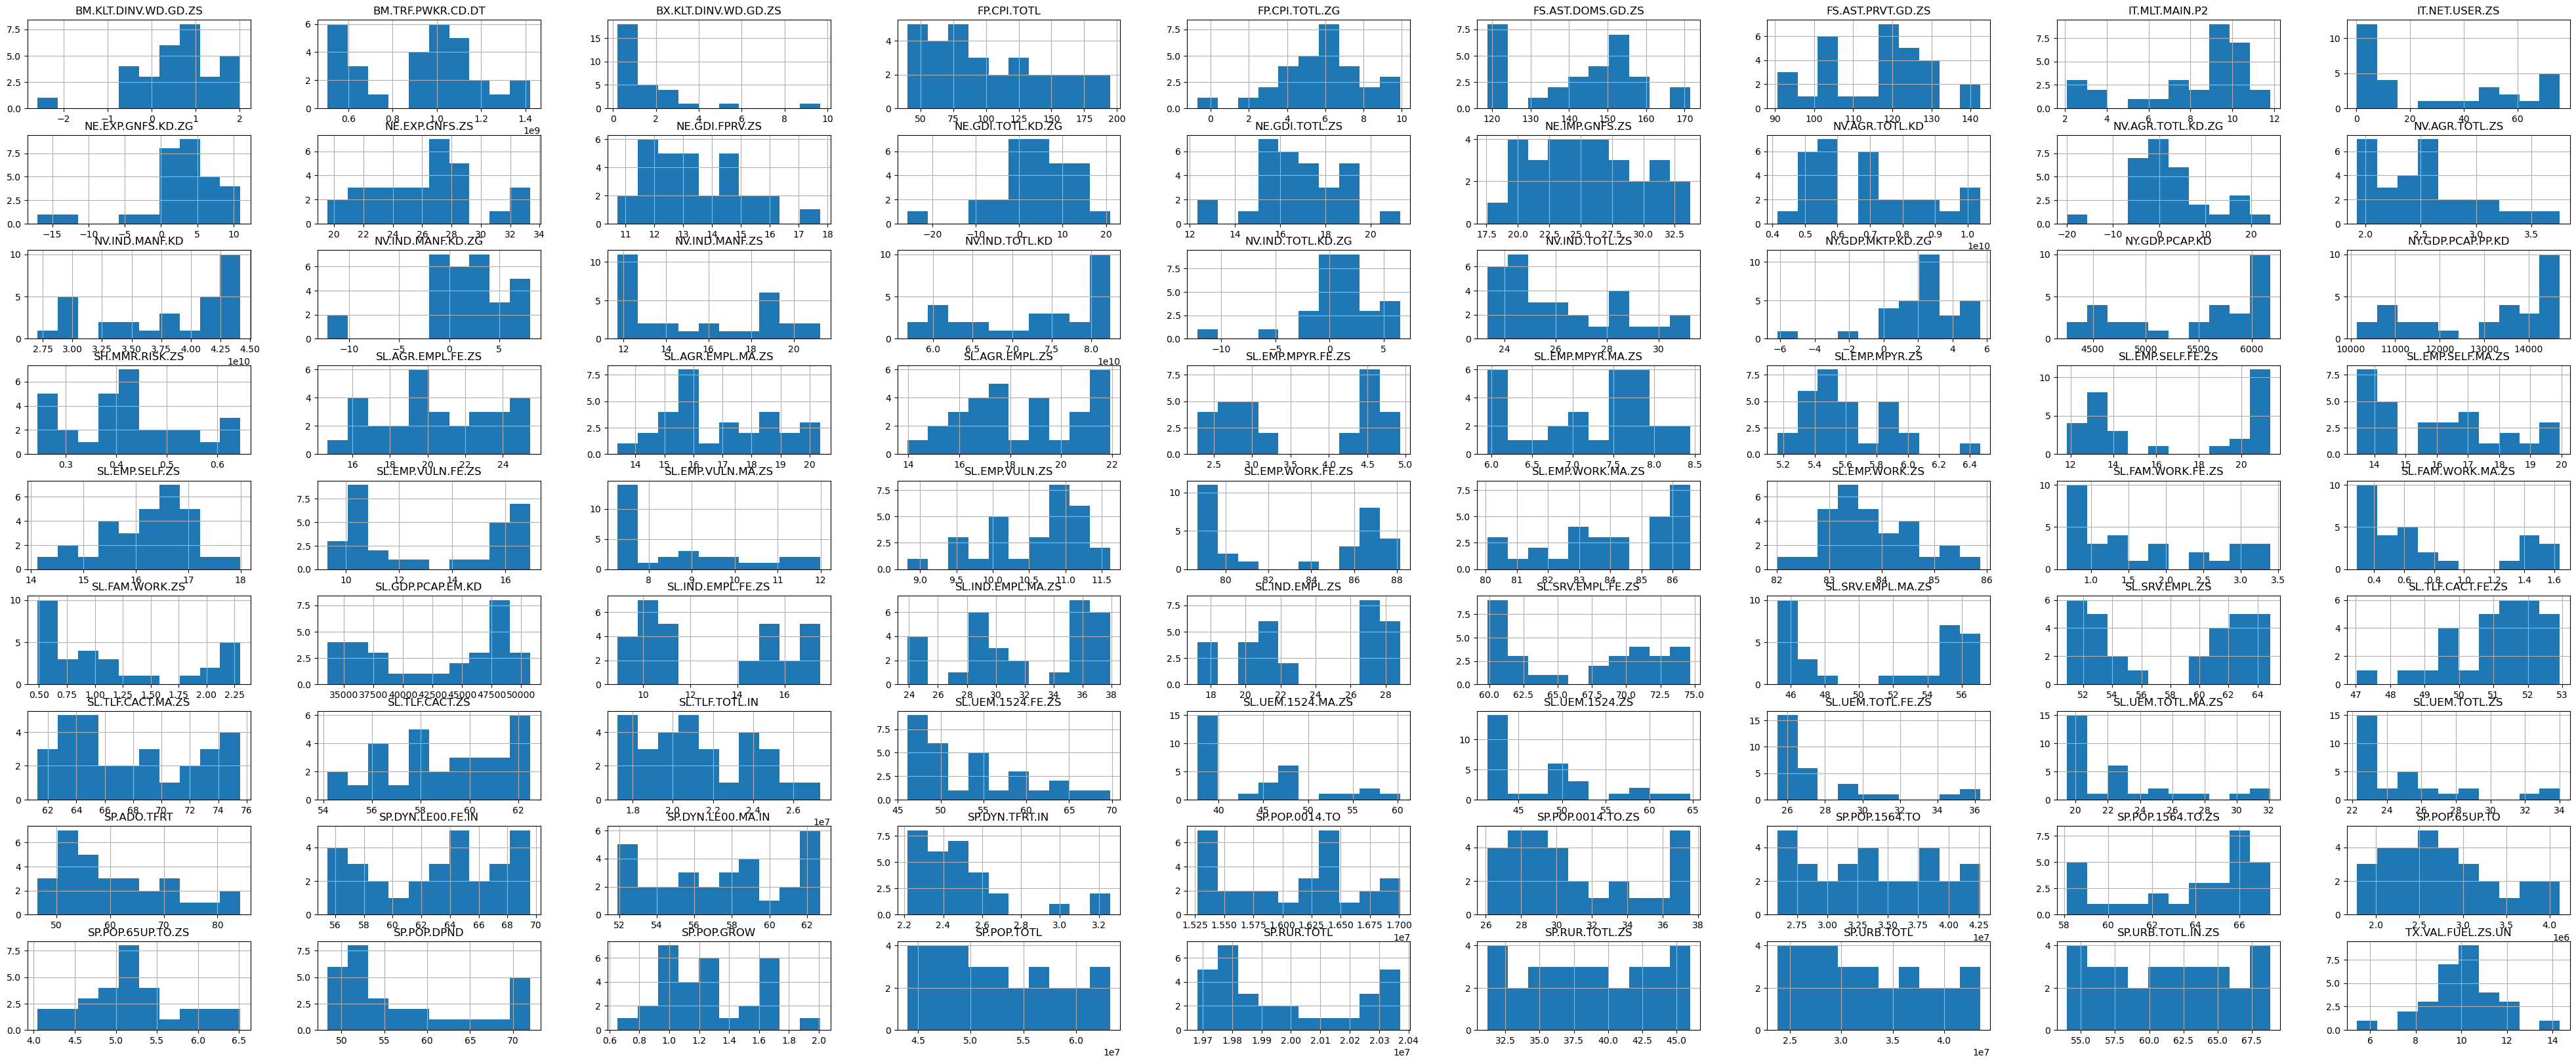

In [795]:
df.hist(bins=10, figsize=(50,20))

plt.show()


### Set the target variable to be SL.UEM.TOTL.ZS - Unemployment, total (% of total labor force) (modeled ILO estimate) ###

In [797]:
df = df.rename(columns={'SL.UEM.TOTL.ZS': 'target'})

SL.UEM.TOTL.ZS #Unemployment, total (% of total labor force) (modeled ILO estimate)

features_ids = wb.series.info(db=25)

ids_table_dict = vars(features_ids)

ids_table_dict = ids_table_dict['items']

df_ids_features = pd.DataFrame(ids_table_dict)

df_features = wb.data.DataFrame( df_ids_features['id'], 'ZAF', range(1994,2024,2), labels=True)


Variable Selection and TTS

## Feature Selection ##

### CORRELATION ###

In [801]:
corr_df = df.corr()

In [802]:
corr_df["target"].sort_values(ascending=False)

series
target               1.000000
SL.UEM.TOTL.MA.ZS    0.995631
SL.UEM.TOTL.FE.ZS    0.987745
SL.UEM.1524.MA.ZS    0.967919
SL.UEM.1524.ZS       0.967122
                       ...   
SP.RUR.TOTL.ZS      -0.832577
SL.IND.EMPL.ZS      -0.844880
SL.IND.EMPL.MA.ZS   -0.888663
SL.EMP.WORK.MA.ZS   -0.888795
IT.MLT.MAIN.P2      -0.933210
Name: target, Length: 81, dtype: float64

In [807]:
corr_df.unstack(level=1)

series                series              
BM.KLT.DINV.WD.GD.ZS  BM.KLT.DINV.WD.GD.ZS    1.000000
                      BM.TRF.PWKR.CD.DT       0.127763
                      BX.KLT.DINV.WD.GD.ZS   -0.403248
                      FP.CPI.TOTL            -0.018267
                      FP.CPI.TOTL.ZG         -0.022001
                                                ...   
TX.VAL.FUEL.ZS.UN     SP.RUR.TOTL            -0.389938
                      SP.RUR.TOTL.ZS         -0.402131
                      SP.URB.TOTL             0.373063
                      SP.URB.TOTL.IN.ZS       0.402131
                      TX.VAL.FUEL.ZS.UN       1.000000
Length: 6561, dtype: float64

In [809]:
corr_df

series,BM.KLT.DINV.WD.GD.ZS,BM.TRF.PWKR.CD.DT,BX.KLT.DINV.WD.GD.ZS,FP.CPI.TOTL,FP.CPI.TOTL.ZG,FS.AST.DOMS.GD.ZS,FS.AST.PRVT.GD.ZS,IT.MLT.MAIN.P2,IT.NET.USER.ZS,NE.EXP.GNFS.KD.ZG,...,SP.POP.65UP.TO,SP.POP.65UP.TO.ZS,SP.POP.DPND,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,TX.VAL.FUEL.ZS.UN
series,,,,,,,,,,,,,,,,,,,,,
BM.KLT.DINV.WD.GD.ZS,1.000000,0.127763,-0.403248,-0.018267,-0.022001,0.087810,0.292310,0.053955,0.054956,0.155311,...,-0.082691,-0.136626,0.019239,0.207618,-0.007475,-0.054165,-0.006815,-0.005010,0.006815,-0.167907
BM.TRF.PWKR.CD.DT,0.127763,1.000000,0.097178,0.541352,-0.374085,0.540504,0.497154,-0.308973,0.478793,-0.112306,...,0.546322,0.574151,-0.804433,0.258724,0.574914,-0.864015,-0.664276,0.589868,0.664276,0.308826
BX.KLT.DINV.WD.GD.ZS,-0.403248,0.097178,1.000000,0.237855,0.039914,-0.070163,-0.174348,-0.309571,0.217373,0.135125,...,0.282926,0.301350,-0.198752,0.069115,0.248484,-0.147271,-0.232230,0.245750,0.232230,0.061851
FP.CPI.TOTL,-0.018267,0.541352,0.237855,1.000000,-0.244516,0.008309,-0.102099,-0.887983,0.974227,-0.221396,...,0.990086,0.964609,-0.870880,0.412176,0.997577,-0.844160,-0.982748,0.996886,0.982748,0.371324
FP.CPI.TOTL.ZG,-0.022001,-0.374085,0.039914,-0.244516,1.000000,-0.403552,-0.277966,0.121445,-0.242942,0.000776,...,-0.288092,-0.331959,0.382664,-0.013121,-0.277044,0.267392,0.306745,-0.278192,-0.306745,-0.041823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SP.RUR.TOTL,-0.054165,-0.864015,-0.147271,-0.844160,0.267392,-0.363878,-0.255782,0.651762,-0.785752,0.258314,...,-0.832573,-0.830751,0.944152,-0.323047,-0.857877,1.000000,0.908092,-0.868427,-0.908092,-0.389938
SP.RUR.TOTL.ZS,-0.006815,-0.664276,-0.232230,-0.982748,0.306745,-0.172722,-0.054338,0.819597,-0.946080,0.242577,...,-0.975935,-0.963266,0.941380,-0.394000,-0.991019,0.908092,1.000000,-0.993158,-1.000000,-0.402131
SP.URB.TOTL,-0.005010,0.589868,0.245750,0.996886,-0.278192,0.072171,-0.038684,-0.870371,0.968580,-0.221931,...,0.989568,0.968619,-0.900410,0.416986,0.999782,-0.868427,-0.993158,1.000000,0.993158,0.373063


In [811]:
corr_df.loc[:,'target']

series
BM.KLT.DINV.WD.GD.ZS   -0.096414
BM.TRF.PWKR.CD.DT       0.310529
BX.KLT.DINV.WD.GD.ZS    0.394471
FP.CPI.TOTL             0.905942
FP.CPI.TOTL.ZG         -0.142312
                          ...   
SP.RUR.TOTL            -0.637109
SP.RUR.TOTL.ZS         -0.832577
SP.URB.TOTL             0.884482
SP.URB.TOTL.IN.ZS       0.832577
TX.VAL.FUEL.ZS.UN       0.244628
Name: target, Length: 81, dtype: float64

In [813]:
corr_df_select = corr_df[abs(corr_df['target']) > 0.8]

In [815]:
corr_df_select.loc[:,'target']

series
FP.CPI.TOTL          0.905942
IT.MLT.MAIN.P2      -0.933210
IT.NET.USER.ZS       0.905134
NV.AGR.TOTL.KD       0.921283
SL.EMP.SELF.MA.ZS    0.888795
SL.EMP.VULN.MA.ZS    0.948283
SL.EMP.WORK.MA.ZS   -0.888795
SL.IND.EMPL.MA.ZS   -0.888663
SL.IND.EMPL.ZS      -0.844880
SL.TLF.TOTL.IN       0.858373
SL.UEM.1524.FE.ZS    0.961331
SL.UEM.1524.MA.ZS    0.967919
SL.UEM.1524.ZS       0.967122
SL.UEM.TOTL.FE.ZS    0.987745
SL.UEM.TOTL.MA.ZS    0.995631
target               1.000000
SP.POP.1564.TO       0.850806
SP.POP.65UP.TO       0.906906
SP.POP.65UP.TO.ZS    0.866142
SP.POP.TOTL          0.889810
SP.RUR.TOTL.ZS      -0.832577
SP.URB.TOTL          0.884482
SP.URB.TOTL.IN.ZS    0.832577
Name: target, dtype: float64

In [817]:
corr_df_select = corr_df_select.transpose()

In [819]:
corr_df_select['target']

series
BM.KLT.DINV.WD.GD.ZS   -0.096414
BM.TRF.PWKR.CD.DT       0.310529
BX.KLT.DINV.WD.GD.ZS    0.394471
FP.CPI.TOTL             0.905942
FP.CPI.TOTL.ZG         -0.142312
                          ...   
SP.RUR.TOTL            -0.637109
SP.RUR.TOTL.ZS         -0.832577
SP.URB.TOTL             0.884482
SP.URB.TOTL.IN.ZS       0.832577
TX.VAL.FUEL.ZS.UN       0.244628
Name: target, Length: 81, dtype: float64

In [821]:
corr_df_select = corr_df_select[abs(corr_df_select['target']) > 0.8]

In [823]:
corr_df_select['target']

series
FP.CPI.TOTL          0.905942
IT.MLT.MAIN.P2      -0.933210
IT.NET.USER.ZS       0.905134
NV.AGR.TOTL.KD       0.921283
SL.EMP.SELF.MA.ZS    0.888795
SL.EMP.VULN.MA.ZS    0.948283
SL.EMP.WORK.MA.ZS   -0.888795
SL.IND.EMPL.MA.ZS   -0.888663
SL.IND.EMPL.ZS      -0.844880
SL.TLF.TOTL.IN       0.858373
SL.UEM.1524.FE.ZS    0.961331
SL.UEM.1524.MA.ZS    0.967919
SL.UEM.1524.ZS       0.967122
SL.UEM.TOTL.FE.ZS    0.987745
SL.UEM.TOTL.MA.ZS    0.995631
target               1.000000
SP.POP.1564.TO       0.850806
SP.POP.65UP.TO       0.906906
SP.POP.65UP.TO.ZS    0.866142
SP.POP.TOTL          0.889810
SP.RUR.TOTL.ZS      -0.832577
SP.URB.TOTL          0.884482
SP.URB.TOTL.IN.ZS    0.832577
Name: target, dtype: float64

In [825]:
corr_df_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, FP.CPI.TOTL to SP.URB.TOTL.IN.ZS
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FP.CPI.TOTL        23 non-null     float64
 1   IT.MLT.MAIN.P2     23 non-null     float64
 2   IT.NET.USER.ZS     23 non-null     float64
 3   NV.AGR.TOTL.KD     23 non-null     float64
 4   SL.EMP.SELF.MA.ZS  23 non-null     float64
 5   SL.EMP.VULN.MA.ZS  23 non-null     float64
 6   SL.EMP.WORK.MA.ZS  23 non-null     float64
 7   SL.IND.EMPL.MA.ZS  23 non-null     float64
 8   SL.IND.EMPL.ZS     23 non-null     float64
 9   SL.TLF.TOTL.IN     23 non-null     float64
 10  SL.UEM.1524.FE.ZS  23 non-null     float64
 11  SL.UEM.1524.MA.ZS  23 non-null     float64
 12  SL.UEM.1524.ZS     23 non-null     float64
 13  SL.UEM.TOTL.FE.ZS  23 non-null     float64
 14  SL.UEM.TOTL.MA.ZS  23 non-null     float64
 15  target             23 non-null     float64
 16  SP.POP.1

In [827]:
corr_df_select = corr_df_select.round(decimals=1)

In [829]:
print(corr_df_select)

series             FP.CPI.TOTL  IT.MLT.MAIN.P2  IT.NET.USER.ZS  \
series                                                           
FP.CPI.TOTL                1.0            -0.9             1.0   
IT.MLT.MAIN.P2            -0.9             1.0            -0.9   
IT.NET.USER.ZS             1.0            -0.9             1.0   
NV.AGR.TOTL.KD             1.0            -0.9             1.0   
SL.EMP.SELF.MA.ZS          1.0            -0.9             0.9   
SL.EMP.VULN.MA.ZS          0.9            -0.9             1.0   
SL.EMP.WORK.MA.ZS         -1.0             0.9            -0.9   
SL.IND.EMPL.MA.ZS         -0.9             0.9            -0.9   
SL.IND.EMPL.ZS            -0.9             0.8            -0.9   
SL.TLF.TOTL.IN             1.0            -0.8             0.9   
SL.UEM.1524.FE.ZS          1.0            -0.9             1.0   
SL.UEM.1524.MA.ZS          0.9            -0.9             1.0   
SL.UEM.1524.ZS             1.0            -0.9             1.0   
SL.UEM.TOT

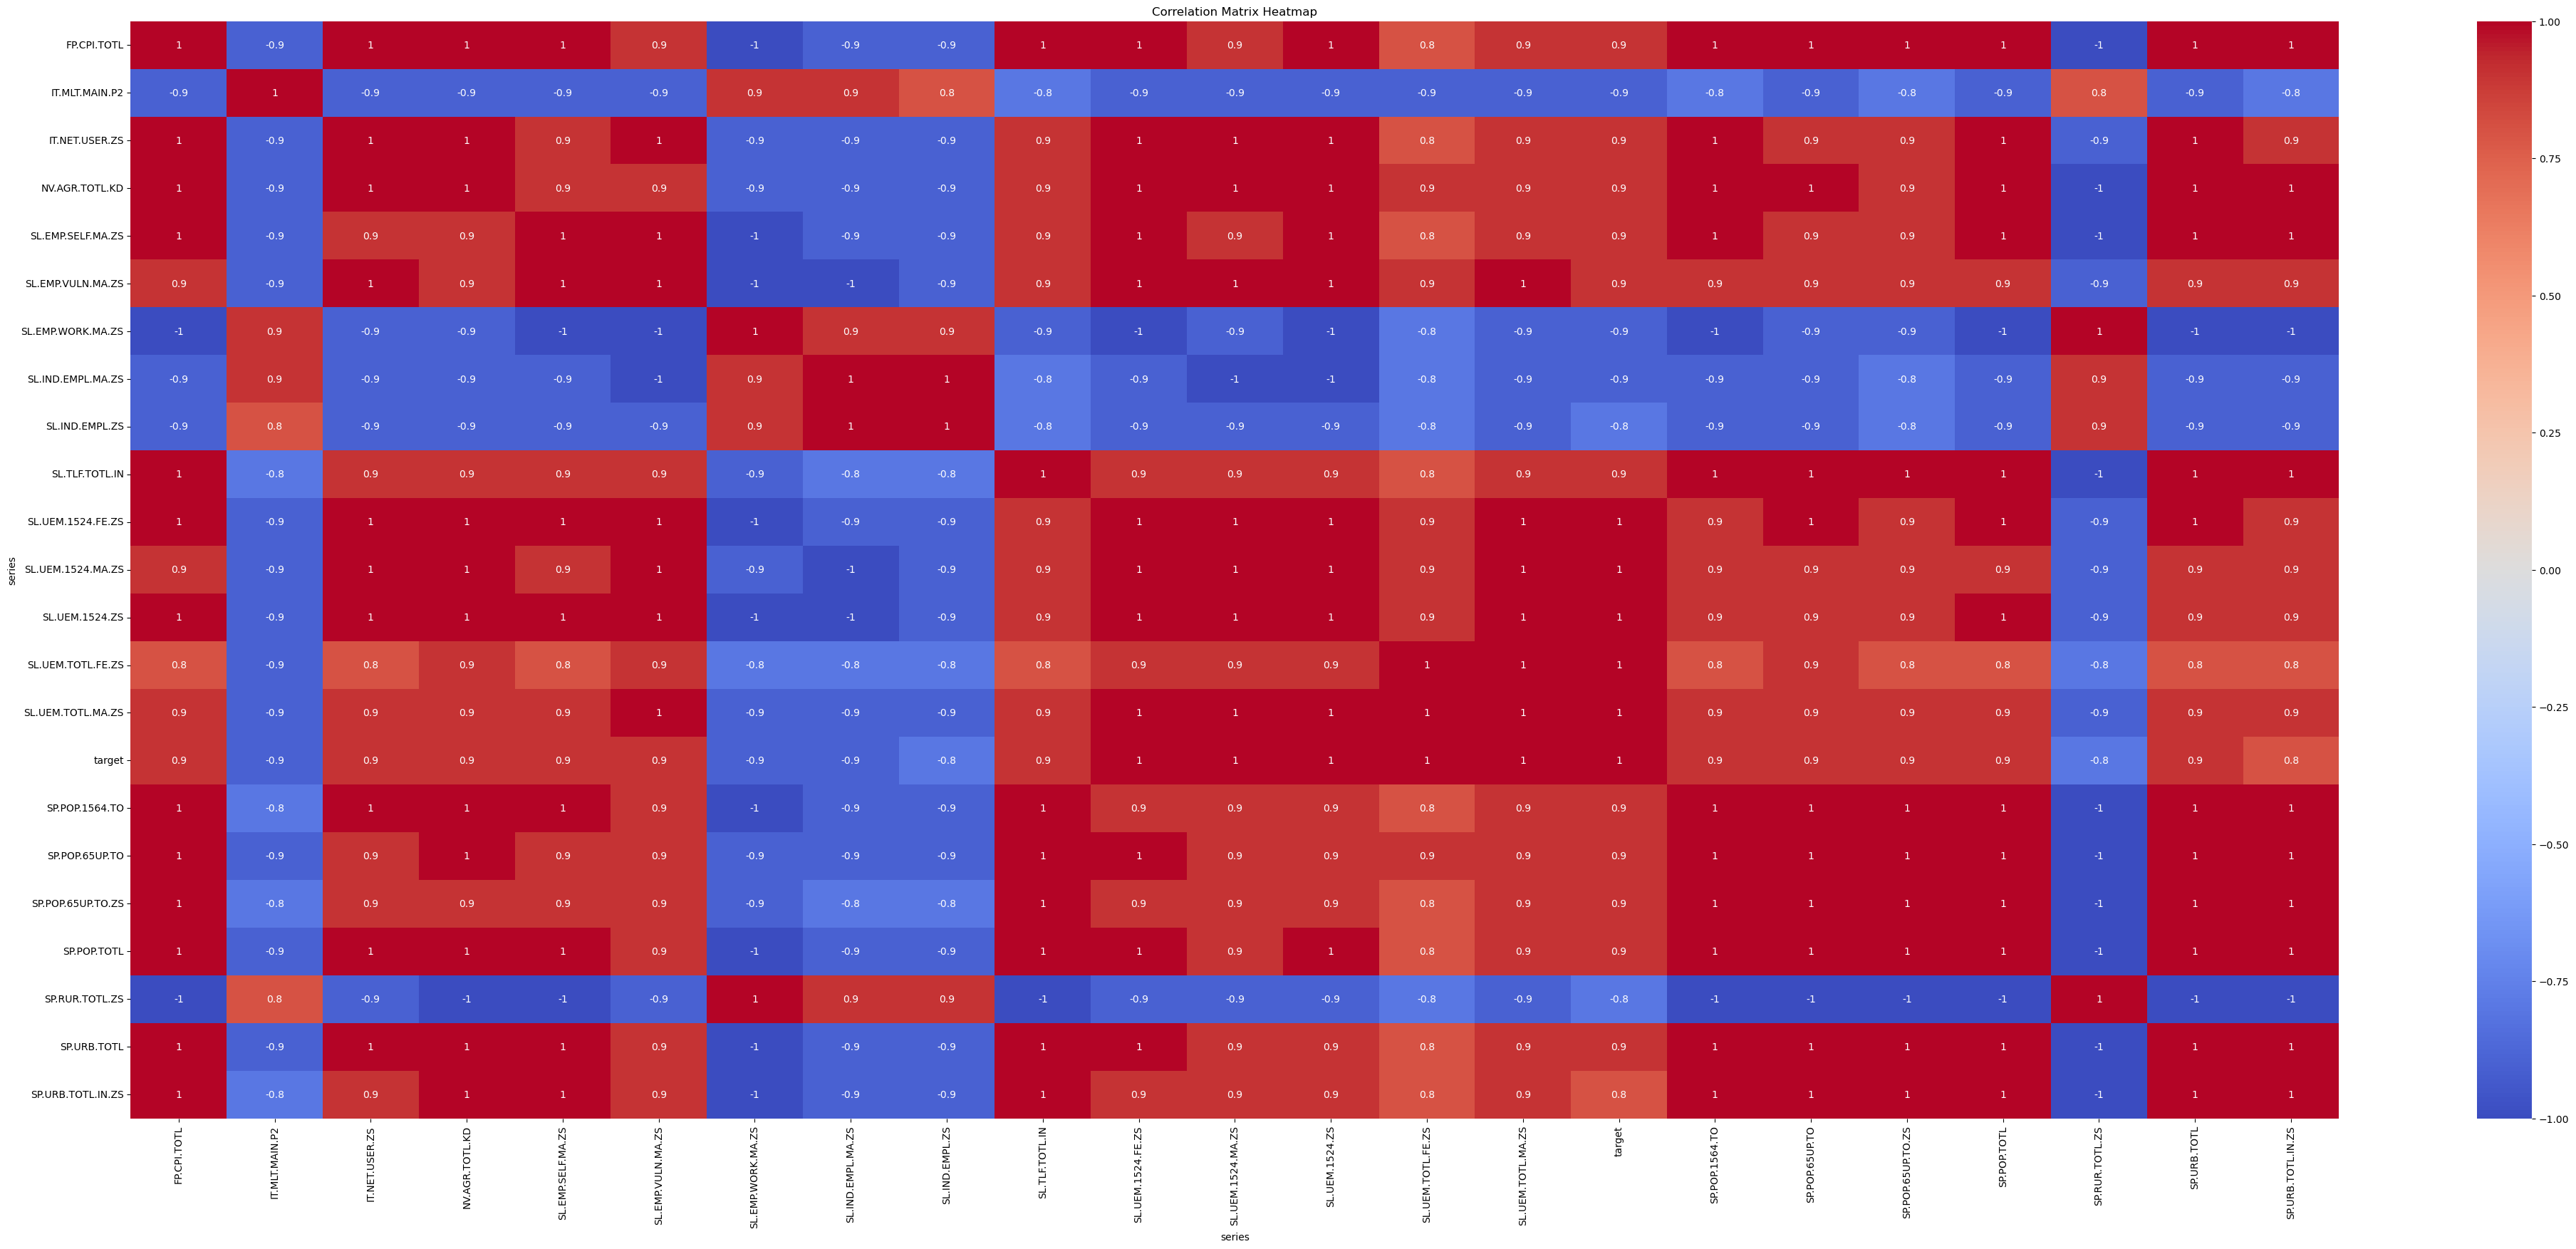

In [831]:
# Plot heatmap of the correlation matrix
import seaborn as sns
plt.figure(figsize=(50,20))
sns.heatmap(corr_df_select, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

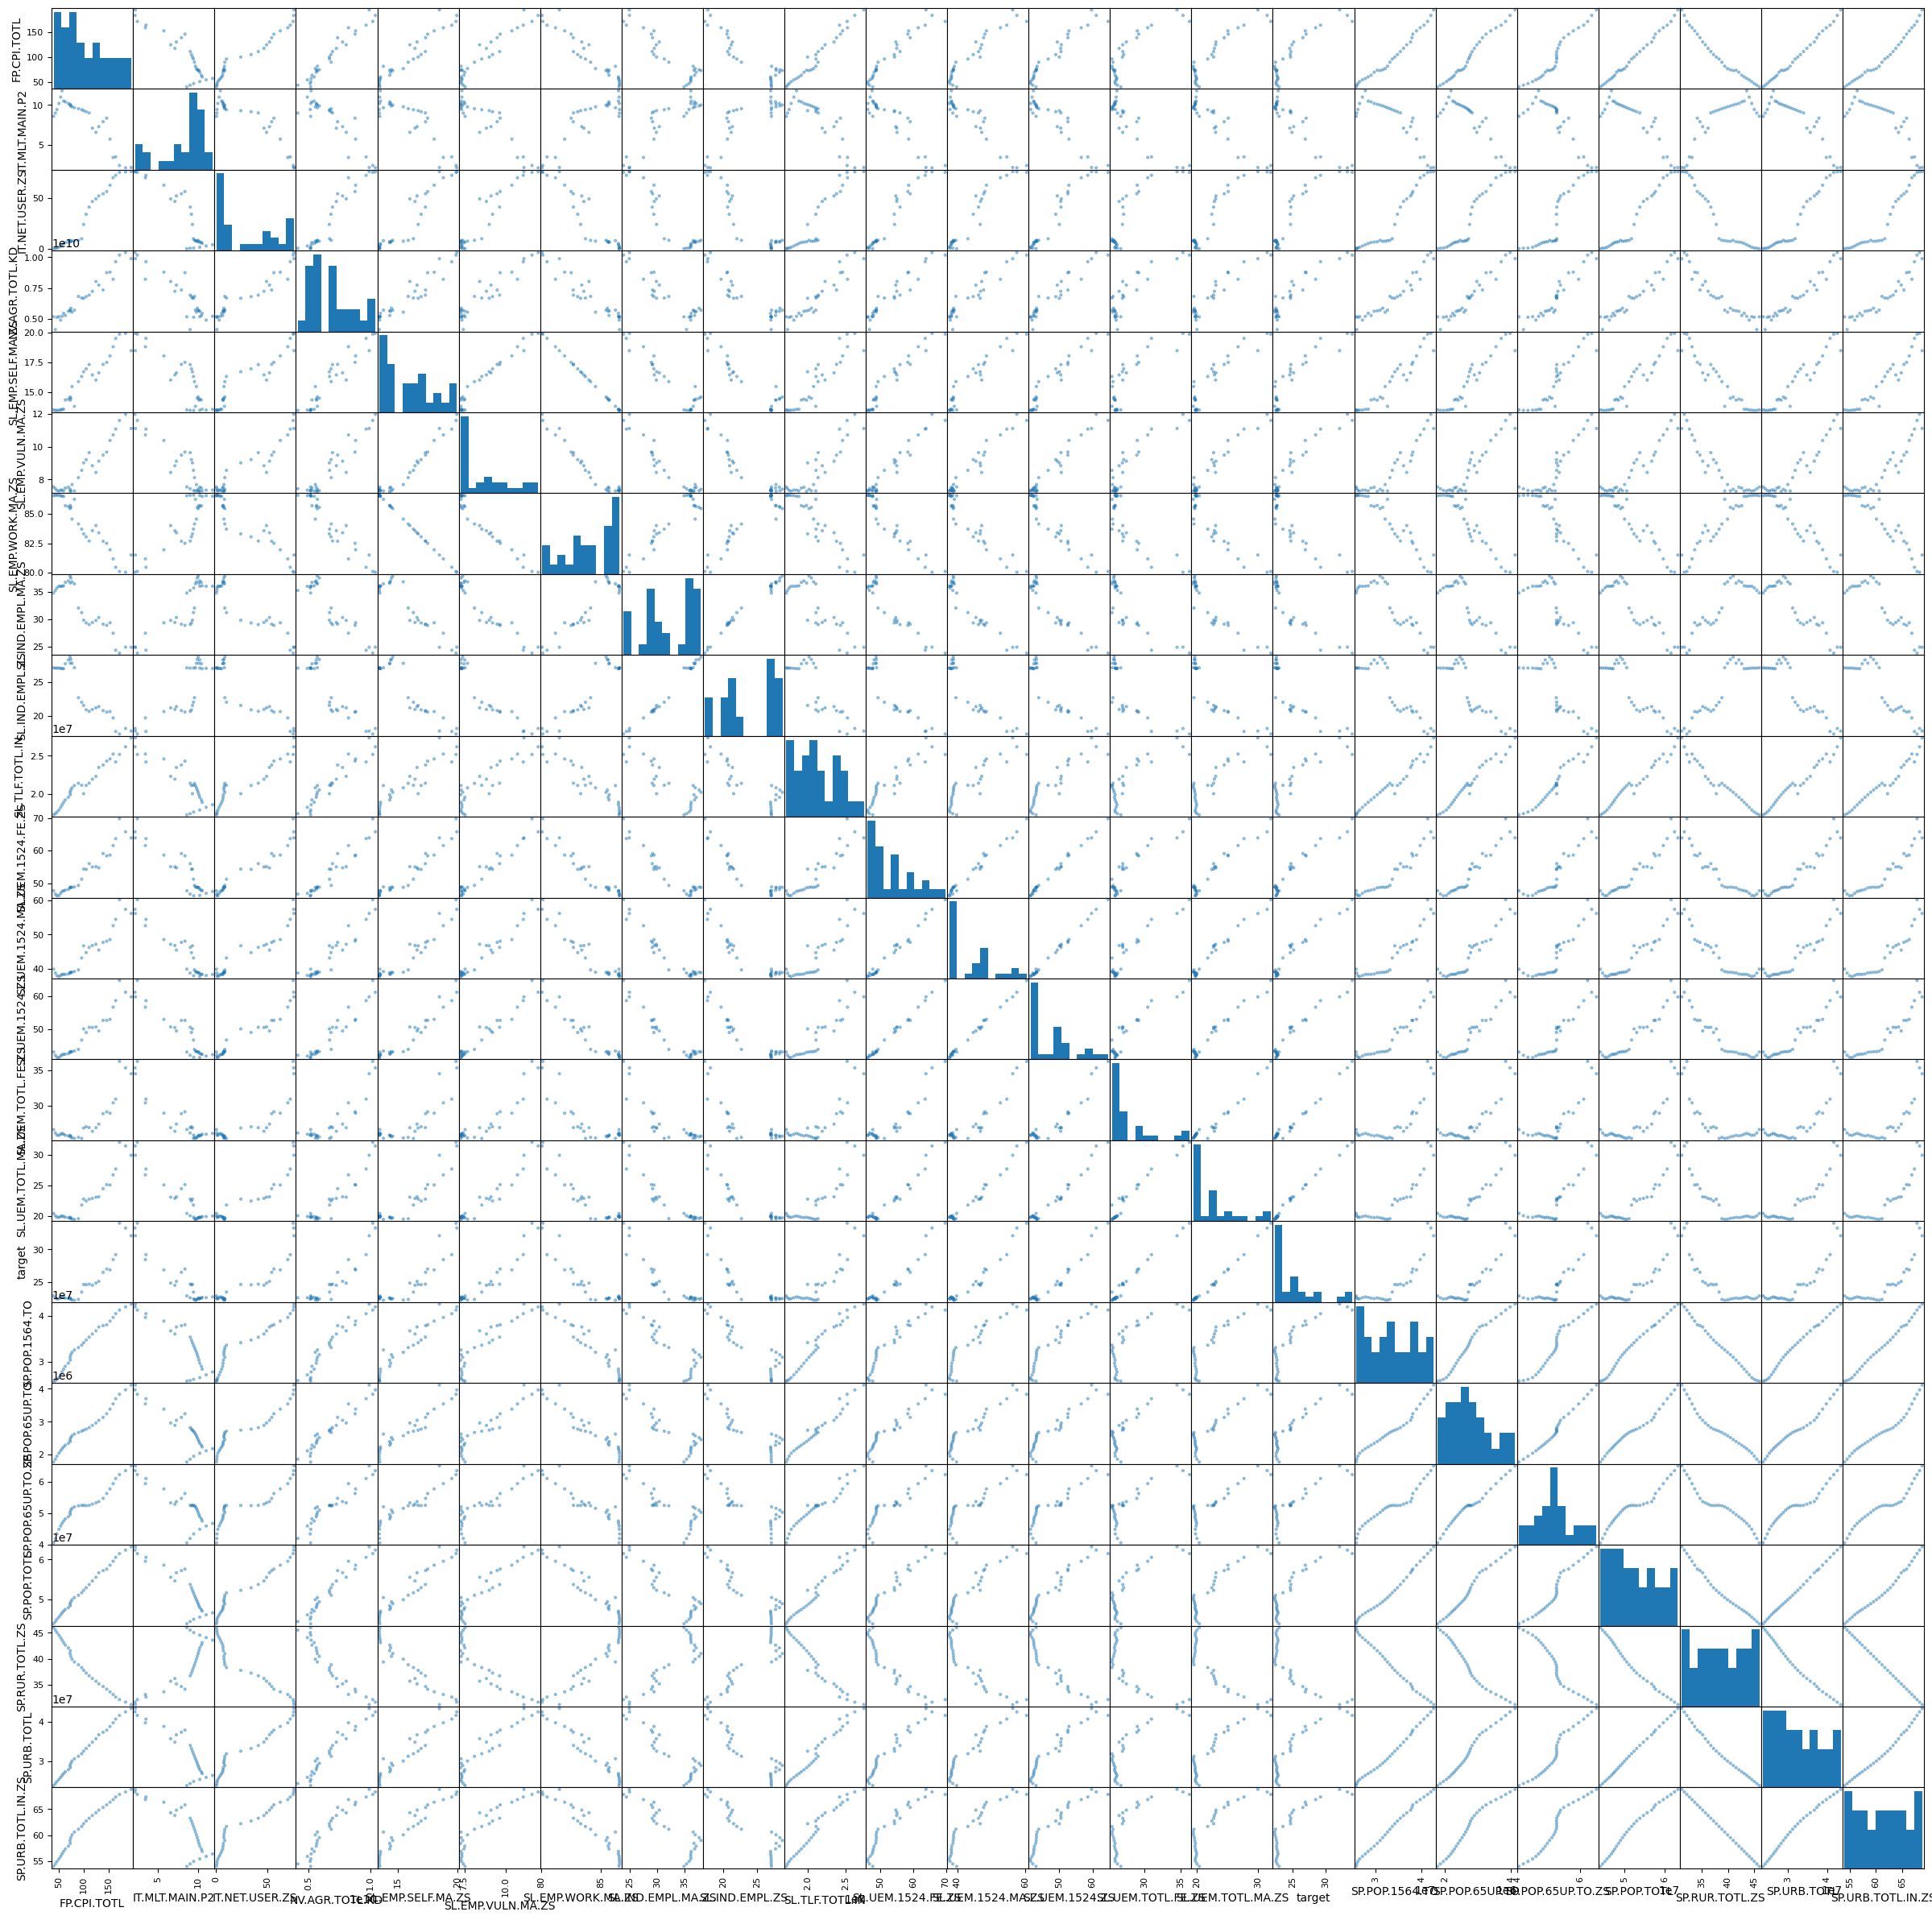

In [832]:
# Plot the most important feature pairs with a scatter plot
from pandas.plotting import scatter_matrix

features = corr_df_select.index.values

scatter_matrix(df[features], figsize=(30, 30))
plt.show()

In [834]:
important_features_df = df[corr_df_select.columns.values]
important_features_df = important_features_df.drop('target', axis=1)

In [835]:
important_features_df

series,FP.CPI.TOTL,IT.MLT.MAIN.P2,IT.NET.USER.ZS,NV.AGR.TOTL.KD,SL.EMP.SELF.MA.ZS,SL.EMP.VULN.MA.ZS,SL.EMP.WORK.MA.ZS,SL.IND.EMPL.MA.ZS,SL.IND.EMPL.ZS,SL.TLF.TOTL.IN,...,SL.UEM.1524.ZS,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SP.POP.1564.TO,SP.POP.65UP.TO,SP.POP.65UP.TO.ZS,SP.POP.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS
YR1994,39.981985,8.58,0.247,5.178187e+09,13.492951,7.544582,86.507049,34.840220,27.185218,17238544.0,...,43.092,26.701,20.444,25857299.0,1781418.0,4.048296,44004139.0,45.996,23763995.0,54.004
YR1995,43.452591,8.99,0.677,4.147728e+09,13.453745,7.436352,86.546267,35.303134,27.153990,17395921.0,...,42.120,26.224,20.069,25975756.0,1866182.0,4.189755,44541554.0,45.514,24268911.0,54.486
YR1996,46.648146,9.44,0.842,5.143182e+09,13.444745,7.332180,86.555255,35.765708,27.158664,17615532.0,...,41.506,25.921,19.832,26230056.0,1956148.0,4.335143,45123018.0,45.033,24802769.0,54.967
YR1997,50.658850,10.20,1.630,5.189471e+09,13.468176,7.292903,86.531837,36.071552,27.149941,17879477.0,...,41.427,25.883,19.804,26608782.0,2047441.0,4.483432,45666838.0,44.551,25321805.0,55.449
YR1998,54.144455,11.00,2.910,4.914429e+09,13.481488,7.351706,86.518512,36.058409,27.113599,18227404.0,...,41.893,26.041,19.930,27216121.0,2120931.0,4.588389,46223880.0,44.070,25853016.0,55.930
YR1999,56.949944,11.80,4.120,5.219124e+09,13.536167,7.351259,86.463833,36.076899,27.081822,18570177.0,...,42.301,26.154,20.020,27845765.0,2183628.0,4.672829,46730335.0,43.589,26361049.0,56.411
YR2000,59.990478,10.50,5.350,5.464423e+09,13.542617,7.303256,86.457383,36.146020,27.063588,18890253.0,...,42.396,26.044,19.934,28460440.0,2238446.0,4.746521,47159719.0,43.109,26829636.0,56.891
YR2001,63.411072,10.40,6.350,5.284097e+09,14.331510,7.477367,85.668490,36.769173,27.802678,19206998.0,...,42.453,25.899,19.819,29085041.0,2291253.0,4.816917,47566800.0,42.632,27288122.0,57.368
YR2002,69.431772,10.20,6.710,5.627563e+09,14.398405,7.527136,85.601607,37.038908,28.384379,19543802.0,...,42.606,25.814,19.752,29750556.0,2345289.0,4.884043,48019415.0,42.102,27802281.0,57.898
YR2003,73.375096,10.10,7.010,5.665891e+09,14.314102,7.275910,85.685886,36.648493,27.887515,19883394.0,...,43.012,25.890,19.813,30416275.0,2401646.0,4.951813,48500348.0,41.554,28346513.0,58.446


In [836]:
wb.series.info(important_features_df.columns.values)

id,value
NV.AGR.TOTL.KD,"Agriculture, forestry, and fishing, value added (constant 2015 US$)"
FP.CPI.TOTL,Consumer price index (2010 = 100)
SL.IND.EMPL.ZS,Employment in industry (% of total employment) (modeled ILO estimate)
SL.IND.EMPL.MA.ZS,"Employment in industry, male (% of male employment) (modeled ILO estimate)"
IT.MLT.MAIN.P2,Fixed telephone subscriptions (per 100 people)
IT.NET.USER.ZS,Individuals using the Internet (% of population)
SL.TLF.TOTL.IN,"Labor force, total"
SP.POP.1564.TO,"Population ages 15-64, total"
SP.POP.65UP.TO.ZS,Population ages 65 and above (% of total population)
SP.POP.65UP.TO,"Population ages 65 and above, total"


In [837]:
print(wb.series.info('SL.UEM.TOTL.ZS')) # Target Variable

id              value
--------------  -------------------------------------------------------------------
SL.UEM.TOTL.ZS  Unemployment, total (% of total labor force) (modeled ILO estimate)
                1 elements


# Modeling #
## Linear Regression Model ##

In [839]:
X = important_features_df

In [840]:
y = df['target']

In [841]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [842]:
# Train a linear regression model on the training set
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

# Model Evaluation #


In [844]:
# Make predictions on the training and test set
linear_predictions_train = linear_model.predict(X_train)
linear_predictions_test = linear_model.predict(X_test)


In [848]:
# Compare the predictions with the actual values
print(linear_predictions_test.round(1))
print(y_test.values.round(1))

[22.5 33.2 22.3 22.6 29.1 26.9]
[22.5 33.3 22.3 22.5 29.2 26.9]


In [850]:
# Calculate the relative error of these predictions
relative_errors = np.abs(linear_predictions_test - y_test) / y_test * 100
print("Relative errors in per cent: ", relative_errors[:10].values)

Relative errors in per cent:  [0.05372062 0.16083627 0.09127903 0.08287686 0.49112521 0.14553356]


In [854]:
# Calculate the root mean squared error on the training and test set
from sklearn.metrics import root_mean_squared_error
rmse_train = root_mean_squared_error(y_train, linear_predictions_train)
print('RMSE Training Set:', rmse_train.round(1))
rmse_test = root_mean_squared_error(y_test, linear_predictions_test)
print('RMSE Test Set:', rmse_test.round(1))

RMSE Training Set: 0.0
RMSE Test Set: 0.1


# Model Explanation - Shaply Values #

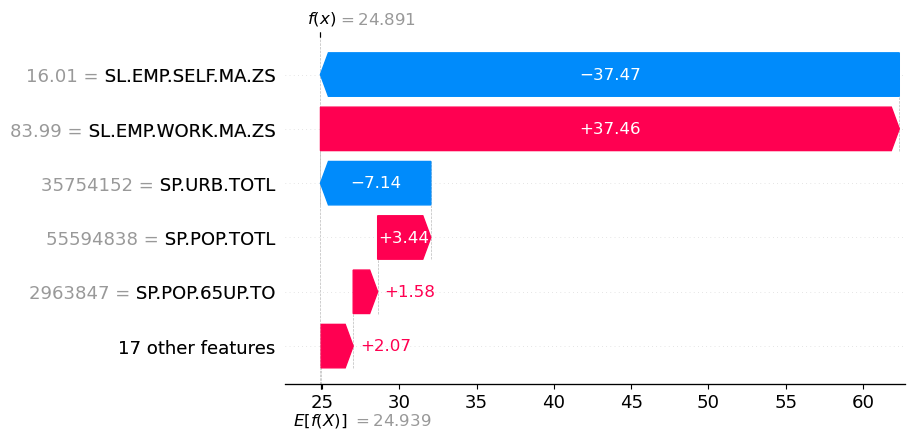

In [862]:
# Establish the baseline sample and appropriate index
X100 = shap.utils.sample(X, 100)
sample_ind = 20

# explain the model with SHAP values
explainer_lm = shap.Explainer(linear_model, X100)
shap_values_lm = explainer_lm(X)

shap.plots.waterfall(shap_values_lm[sample_ind], max_display=6)


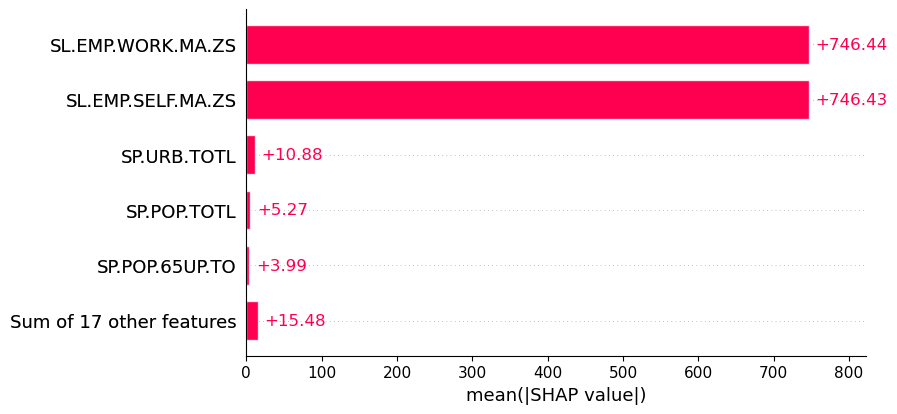

In [864]:
shap.plots.bar(shap_values_lm, max_display=6)

In [866]:
wb.series.info(['SL.EMP.SELF.MA.ZS', 'SL.EMP.WORK.MA.ZS', 'SP.URB.TOTL', 'SP.POP.TOTL', 'SP.POP.65UP.TO'])

id,value
SP.POP.65UP.TO,"Population ages 65 and above, total"
SP.POP.TOTL,"Population, total"
SL.EMP.SELF.MA.ZS,"Self-employed, male (% of male employment) (modeled ILO estimate)"
SP.URB.TOTL,Urban population
SL.EMP.WORK.MA.ZS,"Wage and salaried workers, male (% of male employment) (modeled ILO estimate)"
,5 elements
